In [37]:
import numpy as np
import pandas as pd


In [38]:
df=pd.read_csv("ratings.csv")

df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [39]:
df_movie=pd.read_csv("movies.csv")
filtered_movie = df_movie[df_movie["movieId"] == 356]

print(filtered_movie)

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [40]:
df_tags=pd.read_csv("tags.csv")
df_tags



,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [43]:
merge=pd.merge(df,df_movie)

In [44]:
merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [45]:
terminator_movie_title = "Terminator 2: Judgment Day (1991)"
terminator_ratings = merge[merge["title"] == terminator_movie_title]

average_rating = terminator_ratings["rating"].mean()

print(f"The average user rating for '{terminator_movie_title}' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


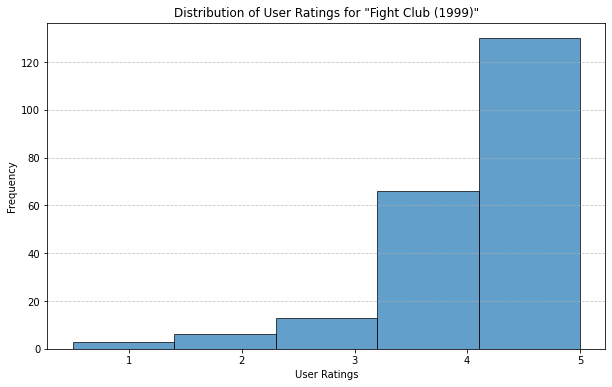

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

fight_club_movie_title = "Fight Club (1999)"

fight_club_ratings = merge[merge["title"] == fight_club_movie_title]

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings["rating"], bins=5, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of User Ratings for "{fight_club_movie_title}"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [48]:
grouped_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'ratings_count', 'ratings_mean']

merged_data = pd.merge(df_movie, grouped_ratings, on='movieId', how='inner')

popular_movies = merged_data[merged_data['ratings_count'] > 50]

most_popular_movie = popular_movies.loc[popular_movies['ratings_mean'].idxmax()]

print(f"The most popular movie based on average user ratings with more than 50 ratings is:")
print(most_popular_movie[['title', 'ratings_mean']])

The most popular movie based on average user ratings with more than 50 ratings is:
title           Shawshank Redemption, The (1994)
ratings_mean                            4.429022
Name: 277, dtype: object


In [49]:
grouped_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'ratings_count', 'ratings_mean']

merged_data = pd.merge(df_movie, grouped_ratings, on='movieId', how='inner')

top_5_popular_movies = merged_data.sort_values(by='ratings_count', ascending=False).head(5)
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'ratings_count']])

Top 5 popular movies based on number of user ratings:
                                 title  ratings_count
314                Forrest Gump (1994)            329
277   Shawshank Redemption, The (1994)            317
257                Pulp Fiction (1994)            307
510   Silence of the Lambs, The (1991)            279
1938                Matrix, The (1999)            278


In [50]:
grouped_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'ratings_count', 'ratings_mean']

merged_data = pd.merge(df_movie, grouped_ratings, on='movieId', how='inner')

scifi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

third_most_popular_scifi_movie = scifi_movies.sort_values(by='ratings_count', ascending=False).iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is:")
print(third_most_popular_scifi_movie[['title', 'ratings_count']])

The third most popular Sci-Fi movie based on the number of user ratings is:
title            Jurassic Park (1993)
ratings_count                     238
Name: 418, dtype: object


In [51]:
highest_imdb_movie = df_movie.loc[df_movie['imdbRating'].idxmax()]

print(f"The movieId of the movie with the highest IMDB rating is: {highest_imdb_movie['movieId']}")

KeyError: 'imdbRating'